In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle
import keras

from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras.preprocessing import text
tf.config.set_visible_devices([], 'GPU')

Parameters

In [2]:
model_path = '../models/tc_model_1_1680701562.h5'
dictionary_path = '../data/dictionary_small_strict_1680697004.pickle'
tokenizer_path = '../models/tokenizer_1680783215.pickle'

The method that loads model & tokenizer & dictionary

In [3]:
def load(model_path, tokenizer_path, dictionary_path):
    with open(tokenizer_path, 'rb') as file:
        tokenizer = pickle.load(file)
        
    with open(dictionary_path, 'rb') as file:
        dictionary = pickle.load(file)
        dictionary = {value: key for key, value in dictionary.items()}
        
    model = keras.models.load_model(model_path)
    
    return model, tokenizer, dictionary

The method takes model, tokenizer & the input text to calculate the interest vector

In [4]:
def calculate_vector(model, tokenizer, text):
    # calculate sequences for the input text
    sequences = tokenizer.texts_to_sequences([text])
    
    # pad calculated sequences to fit the network input
    maxlen = model.layers[0].input_length
    x = pad_sequences(sequences, maxlen=maxlen)
    
    # use model to predict the result
    return model.predict(x, verbose=0)[0]

The method decodes the result vector to human readable form

In [5]:
def visualize_result(vector, dictionary, text):
    label_weight = [(dictionary[index], weight) for index, weight in enumerate(vector)]
    label_weight.sort(key=lambda x: x[1], reverse=True)
    y, x = zip(*label_weight)
    x = np.array(x)
    x *= 100
    
    plt.figure(figsize=(10, 0.25*len(y)))
    plt.ylabel('Category')
    plt.xlabel('Weight in %')
    plt.title(f'Result for text "{text}"')

    plt.plot(x, y, 'r.', label='Category weight')
    plt.plot(x, y, 'b', label='Category weight (line)', linewidth=0.5)
    plt.xticks(np.arange(0, 101, 10))
    
    plt.legend()
    plt.show()

### Predict the result on given input text

Set the text for prediction

In [6]:
text = 'I really like eating in bars like that. I would like to drink more beer'

Load model & tokenizer

In [7]:
model, tokenizer, dictionary = load(model_path, tokenizer_path, dictionary_path)

Calculate the result vector

In [8]:
result = calculate_vector(model, tokenizer, text)

2023-04-06 15:36:39.879811: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


### Visualize the result

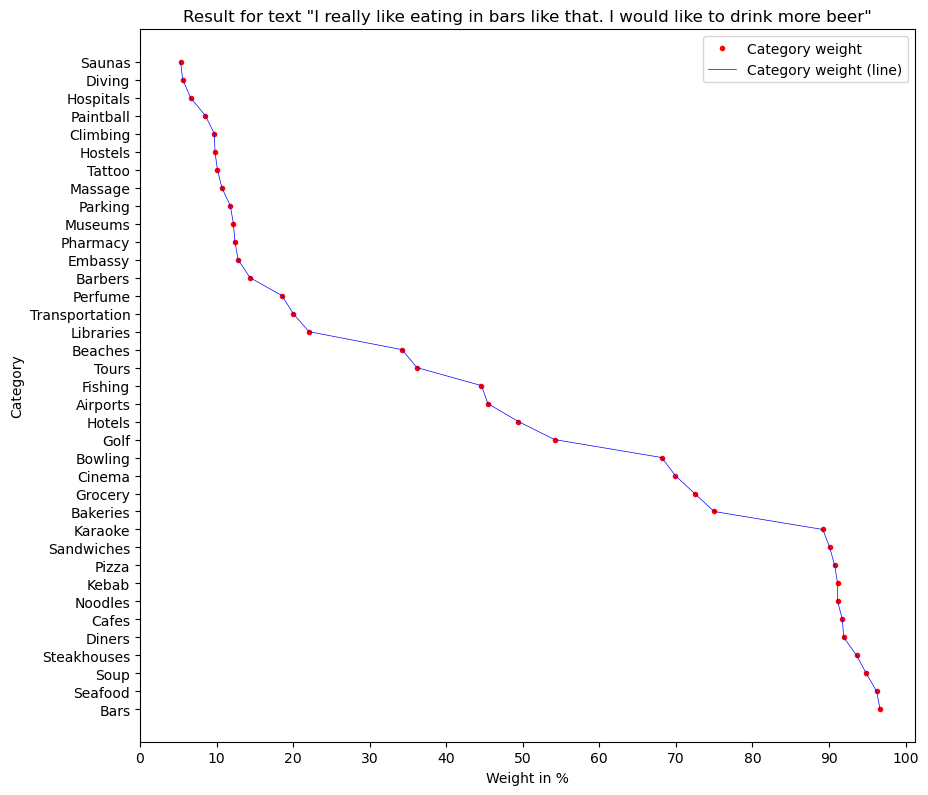

In [9]:
visualize_result(result, dictionary, text)